In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.datasets import  fetch_20newsgroups

In [2]:
df=fetch_20newsgroups()
df.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [22]:
categories=['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey','sci.crypt','sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
train=fetch_20newsgroups(subset='train',categories=categories)
test=fetch_20newsgroups(subset='test',categories=categories)

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model=make_pipeline(TfidfVectorizer(),MultinomialNB())
model.fit(train.data,train.target)
pred=model.predict(test.data)

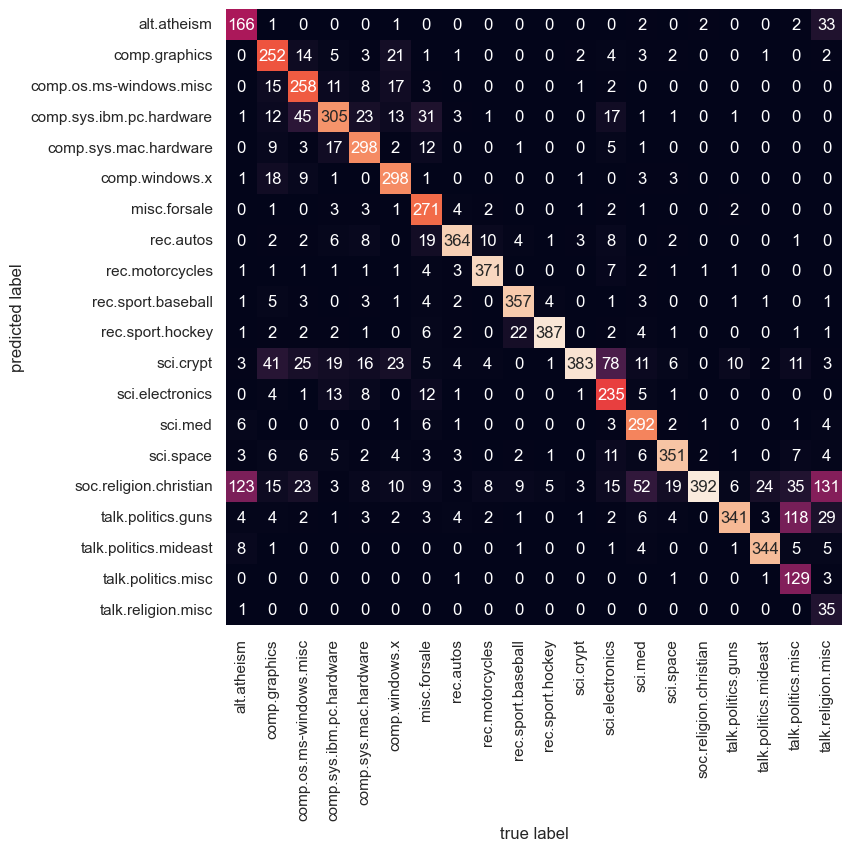

In [23]:
    from sklearn.metrics import confusion_matrix
    cm= confusion_matrix(test.target,pred)
    plt.figure(figsize=(15,8))
    sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=train.target_names, yticklabels=train.target_names)
    plt.xlabel('true label')
    plt.ylabel('predicted label');
    

In [5]:
def predictcategory(s,train=train,model=model):
    pred=model.predict([s])
    return train.target_names[pred[0]]

In [20]:
predictcategory('i own a mercedes benz maybac')

'rec.autos'

In [30]:
predictcategory('the adruino board is cheap')

'sci.electronics'

In [31]:
predictcategory('ibm is hiring a hardware engineer')

'comp.sys.ibm.pc.hardware'

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,test.target)

0.7738980350504514